### Make charts for the classification scores of different methods

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_cv1 = {
    'Method': ['us (ESM2)', 'us (genePT)', 'us (PAIR)', 'KG4SL', 'SL2MF', 'SLMGAE'],
    'AUC': [0.748864213, 0.8097211315, 0.774698083, 0.9791, 0.8184513514, 0.88351],
    'AUPR': [0.9405574001, 0.9488274249, 0.9398311432, 0.9662, 0.8306243045, 0.91575],
    'F1': [0.8849305436, 0.8926315454, 0.870304052, 0.9081, 0.7312492525, 0.84505]
}
df_cv1 = pd.DataFrame(data_cv1)

# data_cv3 = {
#     'Method': ['us (ESM2)', 'us (genePT)', 'us (PAIR)', 'KG4SL', 'SL2MF', 'SLMGAE'],
#     'Classification score': [0.779, 0.791, 0.756, 0.926, 0.474, 0.602]
# }
# df_cv3 = pd.DataFrame(data_cv3)

In [3]:
df_cv1

,Method,AUC,AUPR,F1
0,us (ESM2),0.748864,0.940557,0.884931
1,us (genePT),0.809721,0.948827,0.892632
2,us (PAIR),0.774698,0.939831,0.870304
3,KG4SL,0.979100,0.966200,0.908100
4,SL2MF,0.818451,0.830624,0.731249
5,SLMGAE,0.883510,0.915750,0.845050


In [4]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(12, 6))

# --- 4. Define positions and bar width for grouped bars ---
methods = df_cv1['Method'].tolist()
x = np.arange(len(methods)) # The label locations
bar_width = 0.25 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
ax.bar(x - bar_width, df_cv1['AUC'], bar_width, label='AUC', color='#4E79A7')
ax.bar(x, df_cv1['AUPR'], bar_width, label='AUPR', color='#F28E2B')
ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#579C59')

# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparison of Metrics (AUC, AUPR, F1) by Method', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha='right')
ax.legend()
max_score = max(df_cv1[['AUC', 'AUPR', 'F1']].max())
ax.set_ylim(0, max_score * 1.05) # Add a 5% buffer to the top

# --- 7. Add value labels on top of the bars for clarity ---
def add_value_labels(bars):
    """Function to add labels to bars."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for all three sets of bars
for bars in [ax.patches[:len(methods)], ax.patches[len(methods):2*len(methods)], ax.patches[2*len(methods):]]:
    add_value_labels(bars)

# Ensure tight layout to prevent labels from being cut off
plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('metrics_scores.png')
print("Plot saved to metrics_scores.png")

# Close the figure to free up memory and ensure it's properly saved
plt.close(fig)

Plot saved to metrics_scores.png


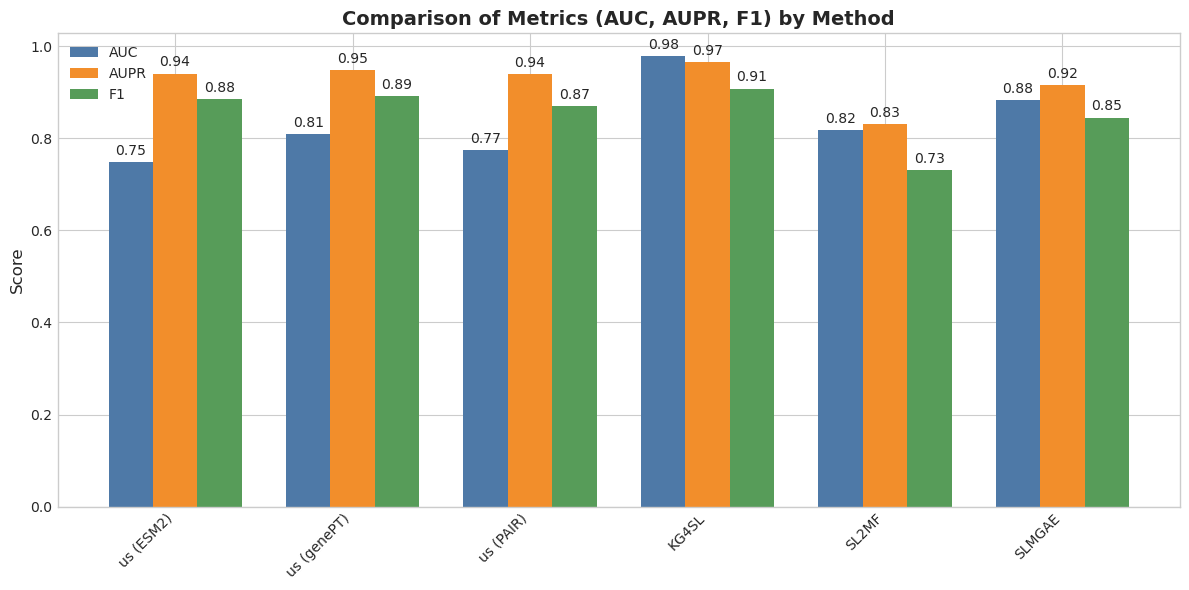

In [24]:
fig

In [6]:
df = pd.DataFrame(data)

In [7]:
df

,Method,CV1,CV3
0,sCilantro,0.920120,0.789735
1,KG4SL,0.951133,0.926033
2,SL2MF,0.793442,0.474974
3,SLMGAE,0.881437,0.602007


In [1]:
import pandas as pd
data = pd.read_csv("perf.csv")

In [2]:
cv1 = data.iloc[:,:4]
cv3 = data.iloc[:, 4:]

In [3]:
cv1.set_index("Unnamed: 0", inplace = True)
cv1.columns = cv1.iloc[0]
# cv3.set_index("Unnamed: 0", inplace = True)
cv3.columns = cv3.iloc[0]

In [4]:
cv1 = cv1.iloc[1:]
cv1

nan,AUC,AUPR,F1
Unnamed: 0,,,
KG4SL,0.8867,0.9048,0.8169
SL2MF,0.8184513514,0.8306243045,0.7312492525
SLMGAE,0.88351,0.91575,0.84505
DDGCN,0.86237,0.19423,0.36597
sCilantro,0.8748624753,0.9662510841,0.9544065977


In [5]:
cv3 = cv3.iloc[1:]
cv3.index = cv1.index
cv3

,AUC,AUPR,F1
Unnamed: 0,,,
KG4SL,0.4893,0.5763,0.742
SL2MF,0.5975121178,0.3003998395,0.5270087592
SLMGAE,0.56535,0.57032,0.67035
DDGCN,0.70378,0.00007,0
sCilantro,0.6587555116,0.9115517312,0.8787552464


In [6]:
cv1 = cv1.astype('float')
cv3 = cv3.astype('float')

In [7]:
cv1.iloc[0,0]

0.8867

Plot saved to metrics_scores.png


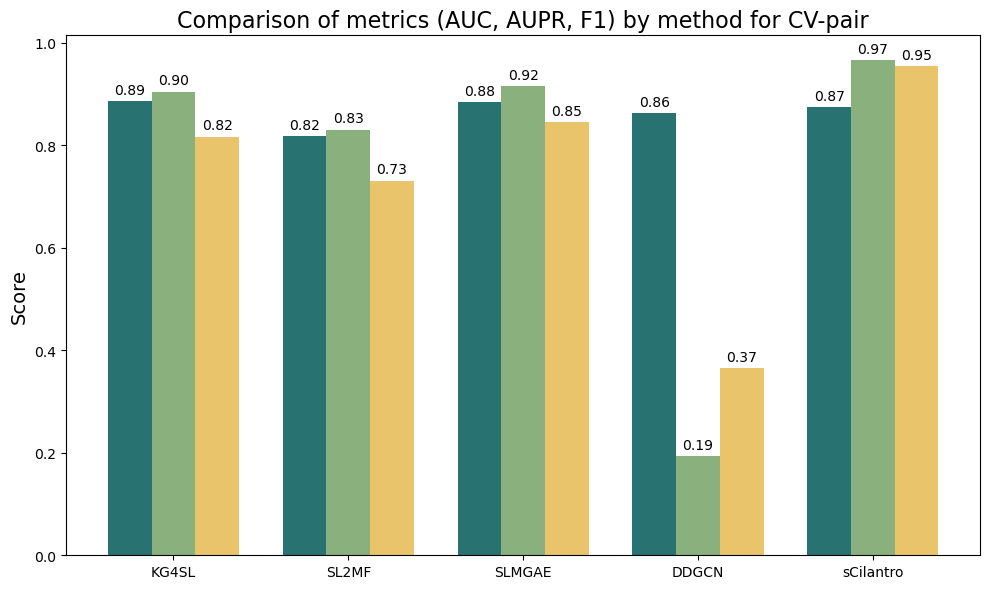

In [15]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(10, 6))

# --- 4. Define positions and bar width for grouped bars ---
methods = cv1.index.tolist()
df_cv1 = cv1
x = np.arange(len(methods)) # The label locations
bar_width = 0.25 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
ax.bar(x - bar_width, df_cv1['AUC'], bar_width, label='AUC', color='#287271')
ax.bar(x, df_cv1['AUPR'], bar_width, label='AUPR', color='#8AB17D')
ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#E9C46A')

# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of metrics (AUC, AUPR, F1) by method for CV-pair', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods)
# ax.legend()
max_score = max(df_cv1[['AUC', 'AUPR', 'F1']].max())
ax.set_ylim(0, max_score * 1.05) # Add a 5% buffer to the top

# --- 7. Add value labels on top of the bars for clarity ---
def add_value_labels(bars):
    """Function to add labels to bars."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for all three sets of bars
for bars in [ax.patches[:len(methods)], ax.patches[len(methods):2*len(methods)], ax.patches[2*len(methods):]]:
    add_value_labels(bars)

# Ensure tight layout to prevent labels from being cut off
plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('figs_to_use/metrics_scores_cv1.pdf')
print("Plot saved to metrics_scores.png")

# Close the figure to free up memory and ensure it's properly saved
# plt.close(fig)

Plot saved to metrics_scores.png


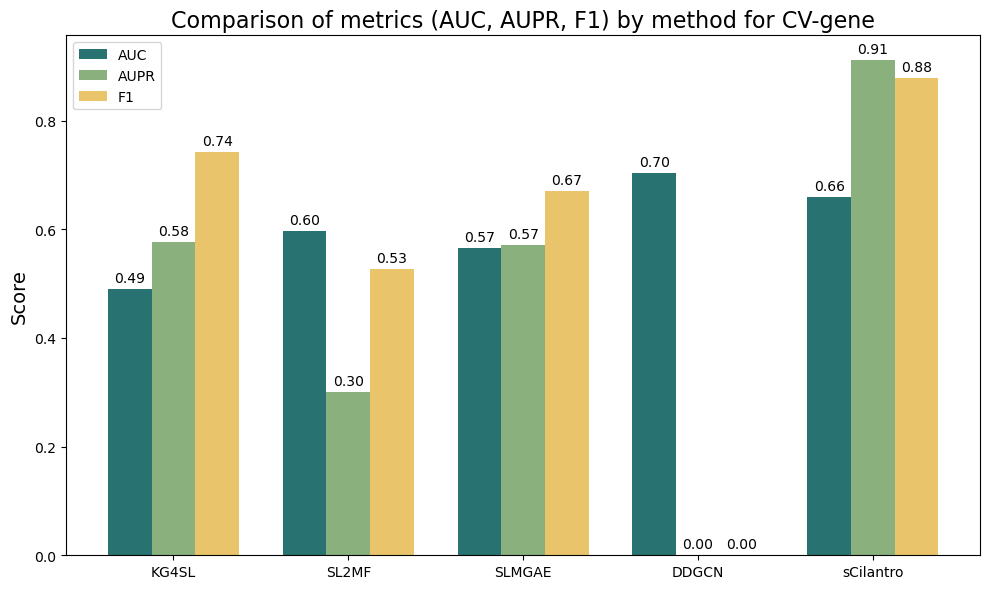

In [16]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(10, 6))

# --- 4. Define positions and bar width for grouped bars ---
methods = cv3.index.tolist()
df_cv1 = cv3
x = np.arange(len(methods)) # The label locations
bar_width = 0.25 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
ax.bar(x - bar_width, df_cv1['AUC'], bar_width, label='AUC', color='#287271')
ax.bar(x, df_cv1['AUPR'], bar_width, label='AUPR', color='#8AB17D')
ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#E9C46A')


# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of metrics (AUC, AUPR, F1) by method for CV-gene', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()
max_score = max(df_cv1[['AUC', 'AUPR', 'F1']].max())
ax.set_ylim(0, max_score * 1.05) # Add a 5% buffer to the top

# --- 7. Add value labels on top of the bars for clarity ---
def add_value_labels(bars):
    """Function to add labels to bars."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for all three sets of bars
for bars in [ax.patches[:len(methods)], ax.patches[len(methods):2*len(methods)], ax.patches[2*len(methods):]]:
    add_value_labels(bars)

# Ensure tight layout to prevent labels from being cut off
plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('figs_to_use/metrics_scores_cv3.pdf')
print("Plot saved to metrics_scores.png")

# Close the figure to free up memory and ensure it's properly saved
# plt.close(fig)

In [20]:
import pandas as pd
data = pd.read_csv("pretraining_ablation_data.csv")

In [22]:
cv1 = data.iloc[:,:4]
cv3 = data.iloc[:, 4:]
cv1.set_index("Unnamed: 0", inplace = True)
cv1.columns = cv1.iloc[0]
cv3.columns = cv3.iloc[0]

cv1 = cv1.iloc[1:]
cv3 = cv3.iloc[1:]
cv3.index = cv1.index
cv3

,AUC,AUPR,F1
Unnamed: 0,,,
Delta with gene,0.6587555116,0.9115517312,0.8787552464
Perturbed with gene,0.6016700681,0.8989251633,0.8263545043
Delta only,0.5541786492,0.8756509565,0.6856840217


In [23]:
cv1 = cv1.astype('float')
cv3 = cv3.astype('float')

Plot saved to pretraining_cv1.png


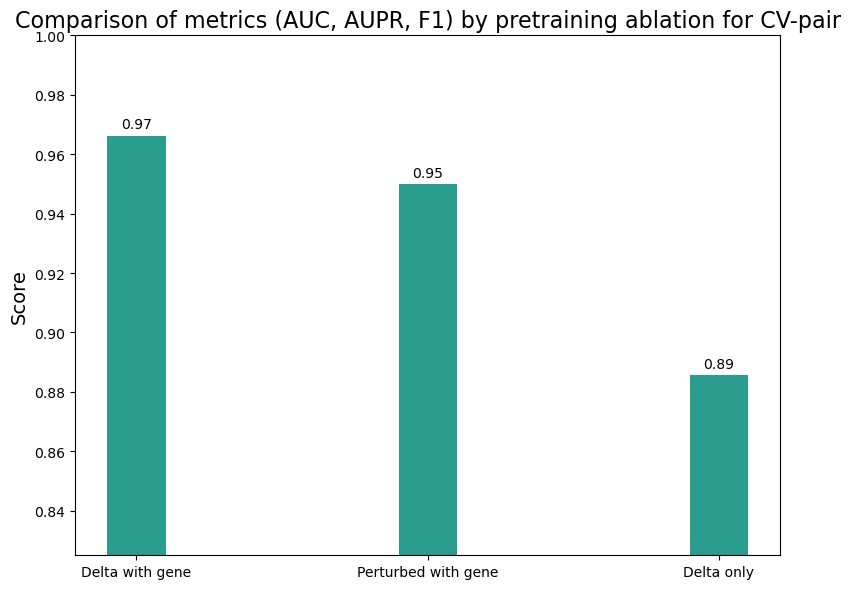

In [26]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(8, 6))

# --- 4. Define positions and bar width for grouped bars ---
methods = cv1.index.tolist()
df_cv1 = cv1
x = np.arange(len(methods)) # The label locations
bar_width = 0.2 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
# ax.bar(x - bar_width, df_cv1['AUC'], bar_width, label='AUC', color='#287271')
ax.bar(x, df_cv1['AUPR'], bar_width, label='AUPR', color='#2A9D8F')
# ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#80E0D0')

# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of metrics (AUC, AUPR, F1) by pretraining ablation for CV-pair', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods)
# ax.legend()
max_score = max(df_cv1[['AUC', 'AUPR', 'F1']].max())
ax.set_ylim(0.825, 1.0) # Add a 5% buffer to the top

# --- 7. Add value labels on top of the bars for clarity ---
def add_value_labels(bars):
    """Function to add labels to bars."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for all three sets of bars
for bars in [ax.patches[:len(methods)], ax.patches[len(methods):2*len(methods)], ax.patches[2*len(methods):]]:
    add_value_labels(bars)

# Ensure tight layout to prevent labels from being cut off
plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('figs_to_use/pretraining_cv1.pdf')
print("Plot saved to pretraining_cv1.png")

# Close the figure to free up memory and ensure it's properly saved
# plt.close(fig)

Plot saved to pretraining_cv3.png


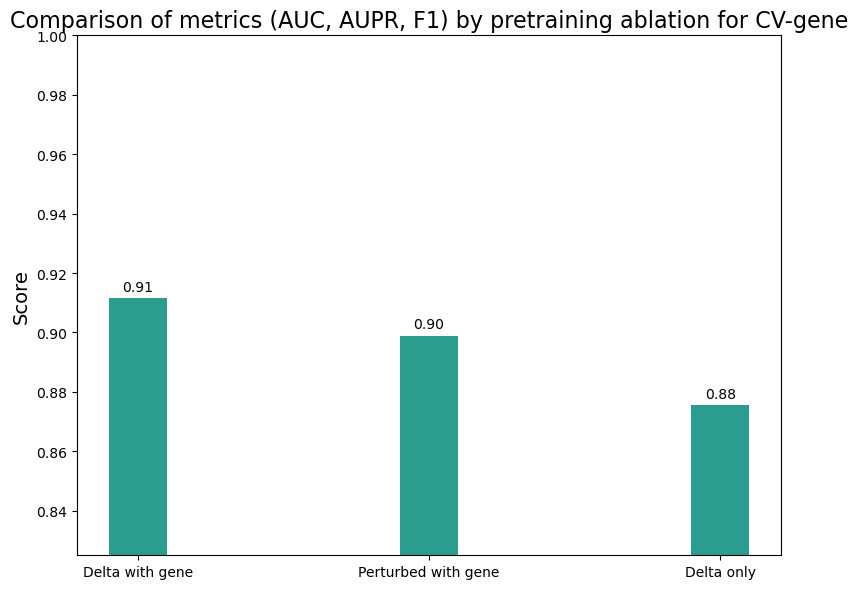

In [27]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(8, 6))

# --- 4. Define positions and bar width for grouped bars ---
methods = cv3.index.tolist()
df_cv1 = cv3
x = np.arange(len(methods)) # The label locations
bar_width = 0.2 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
# ax.bar(x - bar_width, df_cv1['AUC'], bar_width, label='AUC', color='#287271')
ax.bar(x, df_cv1['AUPR'], bar_width, label='AUPR', color='#2A9D8F')
# ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#80E0D0')


# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of metrics (AUC, AUPR, F1) by pretraining ablation for CV-gene', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods)
max_score = max(df_cv1[['AUC', 'AUPR', 'F1']].max())
ax.set_ylim(0.825, 1.0) # Add a 5% buffer to the top

# --- 7. Add value labels on top of the bars for clarity ---
def add_value_labels(bars):
    """Function to add labels to bars."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for all three sets of bars
for bars in [ax.patches[:len(methods)], ax.patches[len(methods):2*len(methods)], ax.patches[2*len(methods):]]:
    add_value_labels(bars)

# Ensure tight layout to prevent labels from being cut off
plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('figs_to_use/pretraining_cv3.pdf')
print("Plot saved to pretraining_cv3.png")

# Close the figure to free up memory and ensure it's properly saved
# plt.close(fig)

In [3]:
gene_ablations = [
    ['Gene representation', 'AUPR', 'AUPR'],
    ['Gene2vec', 0.9662510841, 0.9115517312],
    ['ESM2', 0.9604262907, 0.8976992351],
    ['GenePT ada', 0.844232679, 0.9004936906],
    ['GenePT protein', 0.9530057651, 0.8956569711],
    ['PAIR', 0.9571494181, 0.8878710556],
    ['Geneformer', 0.9547733395, 0.8740812151],
    ['None', 0.8857619958, 0.8756509565]
]

In [4]:
df = pd.DataFrame(gene_ablations)

In [5]:
cv1 = df.iloc[:,:2]
cv3 = df.iloc[:, 2:]
cv1.set_index(0, inplace = True)
cv1.columns = cv1.iloc[0]
cv3.columns = cv3.iloc[0]

cv1 = cv1.iloc[1:]
cv3 = cv3.iloc[1:]
cv3.index = cv1.index
cv3

,AUPR
0,
Gene2vec,0.911552
ESM2,0.897699
GenePT ada,0.900494
GenePT protein,0.895657
PAIR,0.887871
Geneformer,0.874081
None,0.875651


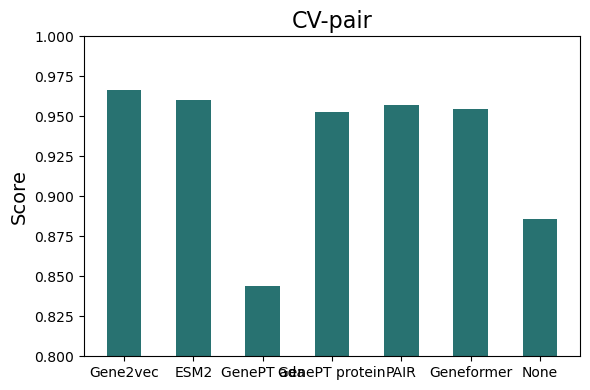

In [18]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(6, 4))

# --- 4. Define positions and bar width for grouped bars ---
methods = cv1.index.tolist()
df_cv1 = cv1
x = np.arange(len(methods)) # The label locations
bar_width = 0.5 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
ax.bar(x, df_cv1['AUPR'], bar_width, label='Precision', color='#287271')
# ax.bar(x, df_cv1['Recall'], bar_width, label='Recall', color='#2A9D8F')
# ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#80E0D0')

# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=14)
ax.set_title('CV-pair', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods)
# ax.legend()
max_score = 1.0
ax.set_ylim(0.8, 1.0) # Add a 5% buffer to the top


plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('figs_to_use/genes_cv1.pdf')

# Close the figure to free up memory and ensure it's properly saved
# plt.close(fig)

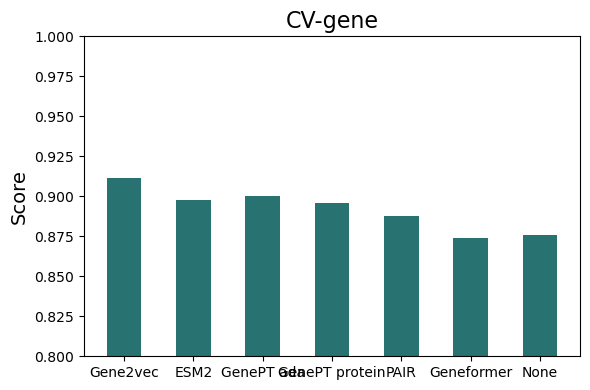

In [19]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(6, 4))

# --- 4. Define positions and bar width for grouped bars ---
methods = cv3.index.tolist()
df_cv1 = cv3
x = np.arange(len(methods)) # The label locations
bar_width = 0.5 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
ax.bar(x, df_cv1['AUPR'], bar_width, label='Precision', color='#287271')
# ax.bar(x, df_cv1['Recall'], bar_width, label='Recall', color='#2A9D8F')
# ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#80E0D0')

# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=14)
ax.set_title('CV-gene', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods)
# ax.legend()
max_score = 1.0
ax.set_ylim(0.8, 1.0) # Add a 5% buffer to the top


plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('figs_to_use/genes_cv3.pdf')

# Close the figure to free up memory and ensure it's properly saved
# plt.close(fig)

In [49]:
df = pd.read_csv("film_no_film.csv")

In [51]:
cv1 = df.iloc[:,:4]
cv3 = df.iloc[:, 4:]
cv1.set_index("Unnamed: 0", inplace = True)
cv1.index = (["Gene2vec", "ESM", "Gene2vec + FiLM", "ESM + FiLM"])
cv3.columns = cv1.columns

cv3.index = cv1.index
cv3

,Precision,Recall,F1
Gene2vec,0.915804,0.837251,0.874353
ESM,0.914653,0.728652,0.809695
Gene2vec + FiLM,0.917986,0.844503,0.878755
ESM + FiLM,0.906512,0.806558,0.851743


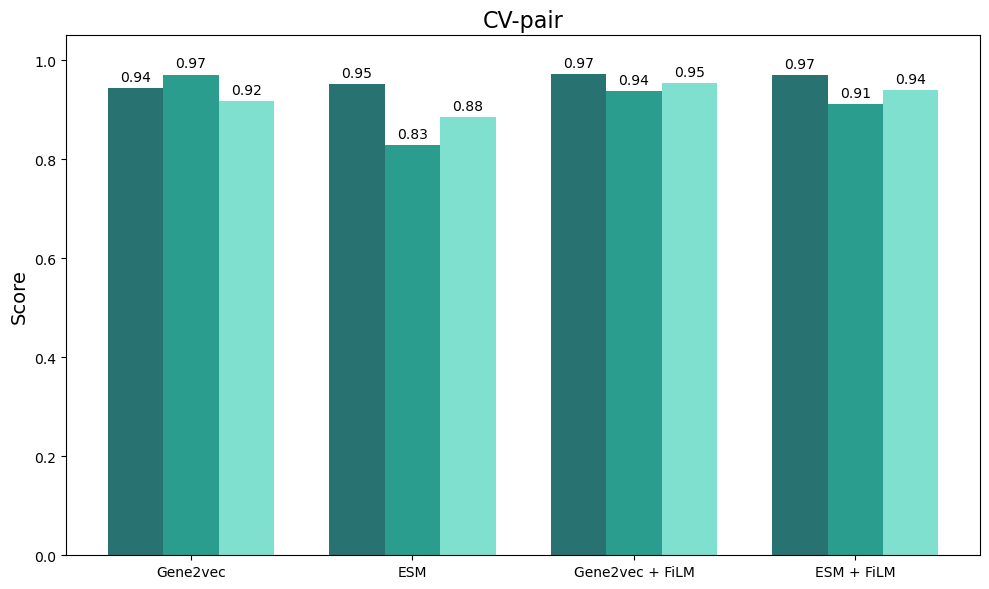

In [56]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(10, 6))

# --- 4. Define positions and bar width for grouped bars ---
methods = cv1.index.tolist()
df_cv1 = cv1
x = np.arange(len(methods)) # The label locations
bar_width = 0.25 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
ax.bar(x - bar_width, df_cv1['Precision'], bar_width, label='Precision', color='#287271')
ax.bar(x, df_cv1['Recall'], bar_width, label='Recall', color='#2A9D8F')
ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#80E0D0')

def add_value_labels(bars):
    """Function to add labels to bars."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for all three sets of bars
for bars in [ax.patches[:len(methods)], ax.patches[len(methods):2*len(methods)], ax.patches[2*len(methods):]]:
    add_value_labels(bars)

# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=14)
ax.set_title('CV-pair', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods)
# ax.legend()
max_score = 1.0
ax.set_ylim(0, max_score * 1.05) # Add a 5% buffer to the top


plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('figs_to_use/film_cv1.pdf')

# Close the figure to free up memory and ensure it's properly saved
# plt.close(fig)

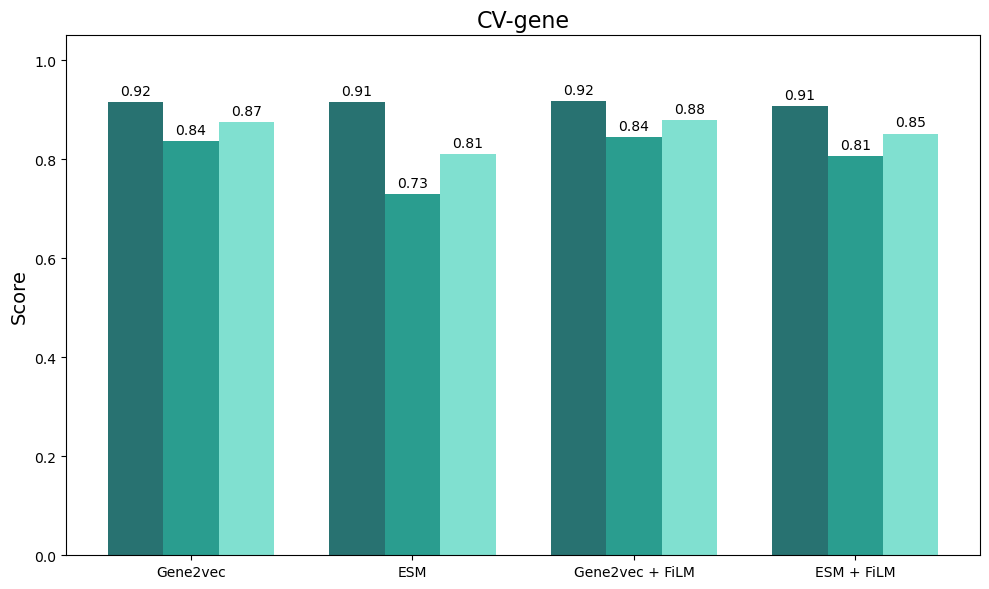

In [55]:
# plt.style.use('seaborn-v0_8-whitegrid') # A clean and professional style
fig, ax = plt.subplots(figsize=(10, 6))

# --- 4. Define positions and bar width for grouped bars ---
methods = cv3.index.tolist()
df_cv1 = cv3
x = np.arange(len(methods)) # The label locations
bar_width = 0.25 # Adjusted for three bars

# --- 5. Plot the bars for each metric ---
# We now plot AUC, AUPR, and F1 from the CV1 dataframe.
ax.bar(x - bar_width, df_cv1['Precision'], bar_width, label='Precision', color='#287271')
ax.bar(x, df_cv1['Recall'], bar_width, label='Recall', color='#2A9D8F')
ax.bar(x + bar_width, df_cv1['F1'], bar_width, label='F1', color='#80E0D0')

def add_value_labels(bars):
    """Function to add labels to bars."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for all three sets of bars
for bars in [ax.patches[:len(methods)], ax.patches[len(methods):2*len(methods)], ax.patches[2*len(methods):]]:
    add_value_labels(bars)

# --- 6. Customize the plot labels and title ---
ax.set_ylabel('Score', fontsize=14)
ax.set_title('CV-gene', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(methods)
# ax.legend()
max_score = 1.0
ax.set_ylim(0, max_score * 1.05) # Add a 5% buffer to the top


plt.tight_layout()

# --- 8. Save the plot to a file instead of showing it ---
# This is a more reliable way to view the plot in the Canvas environment.
plt.savefig('figs_to_use/film_cv3.pdf')

# Close the figure to free up memory and ensure it's properly saved
# plt.close(fig)